## Import libraries

In [1]:
#Enable plots to be displayed in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import statistics
import string
import regex as reg
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [3]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

## Mount to Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd /content/gdrive/MyDrive/VIT/Tamil Argumentation/

/content/gdrive/MyDrive/VIT/Tamil Argumentation


In [ ]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Tamil Font

In [48]:
import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['./tamil_font']

for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

#default english
plt.rc('font', family='Sans Serif')

## Reading Data from a CSV File




In [14]:
yt_df = pd.read_excel('youtube_dataset_final_processed.xlsx',index_col=False)

In [15]:
new_column_names =  ['sno', 'video_url', 'Topic', 'video_content', 'Comments', 'Language', 'Quality',
       'Stance_wrt_topic', 'Stance_wrt_content', 'Argumentation', 'Comment', 'Responding_to_tone',
       'writer_characteristics', 'Remark', 'Relevancy']

yt_df.columns = new_column_names

## Preliminary data inspection



In [16]:
yt_df.shape

(2134, 15)

In [17]:
#Print general information about a DataFrame including the index dtype and columns, non-null values and memory usage
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sno                     2134 non-null   int64 
 1   video_url               2134 non-null   object
 2   Topic                   2134 non-null   object
 3   video_content           1123 non-null   object
 4   Comments                2134 non-null   object
 5   Language                2134 non-null   object
 6   Quality                 2134 non-null   object
 7   Stance_wrt_topic        2134 non-null   object
 8   Stance_wrt_content      2134 non-null   object
 9   Argumentation           2134 non-null   int64 
 10  Comment                 2134 non-null   int64 
 11  Responding_to_tone      2134 non-null   int64 
 12  writer_characteristics  2134 non-null   int64 
 13  Remark                  2134 non-null   int64 
 14  Relevancy               2134 non-null   object
dtypes: i

In [18]:
# Use the .head(n) function to look at the first 'n' rows of our news dataframe. The default n is 5, we are now changing it to view the first 10 rows
yt_df.head(10)


,sno,video_url,Topic,video_content,Comments,Language,Quality,Stance_wrt_topic,Stance_wrt_content,Argumentation,Comment,Responding_to_tone,writer_characteristics,Remark,Relevancy
0,1,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,But vaccine how much effective must,English,Med,Undetermined,Undetermined,0,1,0,0,0,Relevant
1,2,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,Good story,English,Med,Undetermined,Against,0,1,0,0,0,Relevant
2,3,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,Corana vaccine pottavanga aurvedhik la irunthu...,Code-Mixed,Med,Undetermined,Undetermined,0,1,0,0,0,Relevant
3,4,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,தடப்பூசி நம் உடலில் எப்படி வேலை செய்கிறது சொல்...,Tamil,Med,Undetermined,For,0,1,0,0,0,Relevant
4,5,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,My health my rights ஏண்டா குறுக்க மறுக்க வரீங்க,Code-Mixed,Med,Undetermined,Undetermined,0,1,0,0,0,Relevant
5,6,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,எங்களுடைய ஆரோக்கியத்திற்கு இவ்வளவு முக்கியத்து...,Tamil,Med,Undetermined,For,0,1,0,0,0,Relevant
6,7,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,டெல்டா.வருது.டாகெம்மாபுன்ட.கர்ப்ரேட்.அரசுவேலை,Tamil,Low,Undetermined,Undetermined,0,0,0,0,1,Relevant
7,8,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,சரி. ஒரு முறை கொரோனா கிருமிகள் உடலுக்குள் போன ...,Tamil,High,Against,Against,1,1,0,0,0,Relevant
8,9,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,Don't trust anyone think of ur own..and decide...,English,Med,Undetermined,Against,0,1,0,0,0,Relevant
9,10,https://www.youtube.com/watch?v=hX-dyz2xV4Y,Covid Vaccine,Reporter Ranjith explains the workings of Covi...,Injection potalum savu tha corona vanthalum sa...,Code-Mixed,Med,Against,Against,0,1,0,0,0,Relevant


In [19]:
yt_df.columns

Index(['sno', 'video_url', 'Topic', 'video_content', 'Comments', 'Language',
       'Quality', 'Stance_wrt_topic', 'Stance_wrt_content', 'Argumentation',
       'Comment', 'Responding_to_tone', 'writer_characteristics', 'Remark',
       'Relevancy'],
      dtype='object')

## Unique Values and Frequency

Topics :  ['Covid Vaccine' 'Alcohol' 'Free Bus pass for women' 'Neet' 'Jallikattu'] 

Topic
Covid Vaccine              694
Jallikattu                 520
Alcohol                    429
Free Bus pass for women    350
Neet                       141
Name: count, dtype: int64 



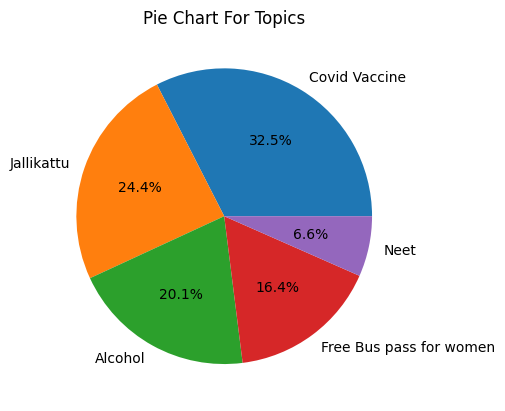

In [20]:
topics = yt_df['Topic'].unique()

print("Topics : ",yt_df['Topic'].unique(),"\n")
print(yt_df['Topic'].value_counts(),"\n")

vc = yt_df['Topic'].value_counts()

plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%')

plt.title('Pie Chart For Topics')
plt.show()

Total videos :  18 

Videos in each topic

                    topics  video_urls
0            Covid Vaccine           2
1                  Alcohol           5
2  Free Bus pass for women           3
3                     Neet           1
4               Jallikattu           7


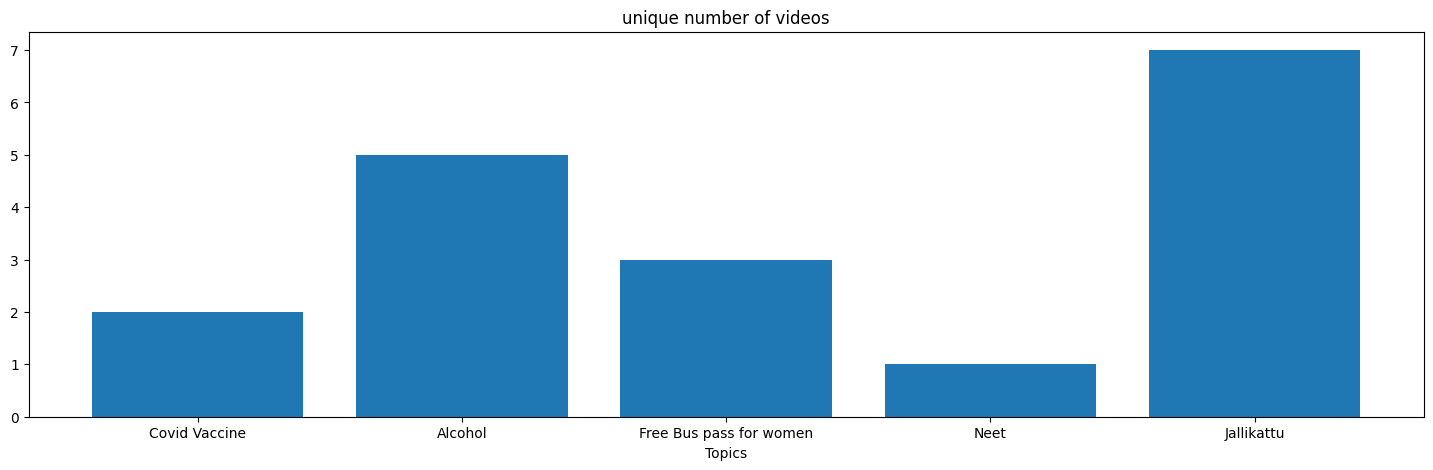

In [23]:
ptweets = yt_df['video_url'].unique()

print("Total videos : ",len(ptweets),"\n")

print("Videos in each topic\n")

p_t = []

for x in topics:
  sub_df = yt_df[yt_df['Topic']==x]
  p_t.append(len(sub_df['video_url'].value_counts()))

pt_df = pd.DataFrame({"topics":topics,"video_urls":p_t})

print(pt_df)

plt.figure(figsize=(18,5))

plt.bar(pt_df["topics"],pt_df["video_urls"])

plt.xlabel('Topics')
plt.title('unique number of videos')

plt.show()

Language
English       991
Code-Mixed    631
Tamil         512
Name: count, dtype: int64 

Quality
Med     1516
High     351
Low      266
Med        1
Name: count, dtype: int64 

Stance_wrt_topic
Undetermined    1253
For              466
Against          415
Name: count, dtype: int64 

Stance_wrt_content
Undetermined    1304
Against          516
For              314
Name: count, dtype: int64 

Argumentation
0    1707
1     427
Name: count, dtype: int64 

Comment
1    1616
0     518
Name: count, dtype: int64 

Responding_to_tone
0    2027
1     107
Name: count, dtype: int64 

writer_characteristics
0    2010
1     124
Name: count, dtype: int64 

Remark
0    1527
1     607
Name: count, dtype: int64 

Relevancy
Relevant      1925
Irrelevant     209
Name: count, dtype: int64 



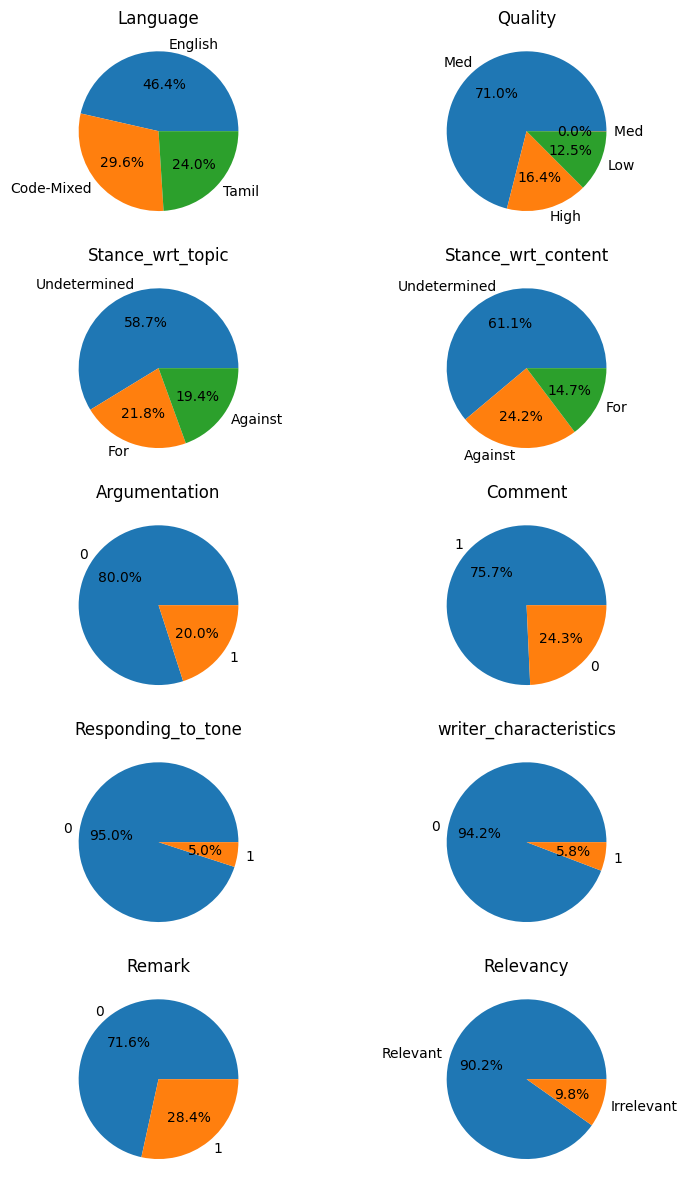

In [35]:
sub_cols = yt_df.columns[5:]

fig, axs = plt.subplots(5, 2, figsize=(8, 12))

axs = axs.flatten()

for i in range(len(sub_cols)):
  vc = yt_df[sub_cols[i]].value_counts()

  print(vc,"\n")

  axs[i].pie(vc.values, labels=vc.index, autopct='%1.1f%%')
  axs[i].set_title(sub_cols[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

## Word Count

In [36]:
#To make it easier to reuse in the future, we can create a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

**Mean and Mode of word count for the comments**

Statistics of Word Count

Mean :  20
Mode :  3


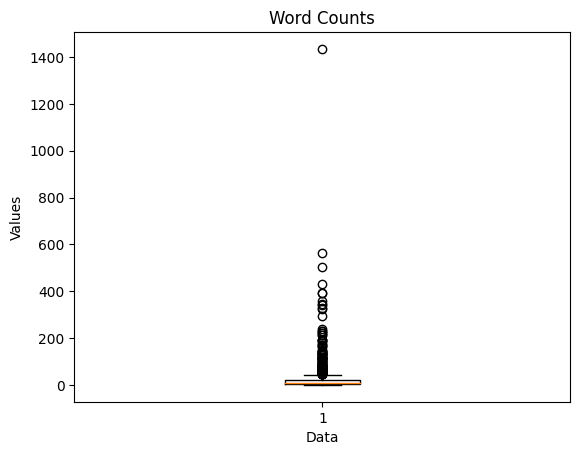

In [38]:
wc = 0
z =0
wc_list = []

translation_table = str.maketrans("", "", string.punctuation)

for x in yt_df['Comments']:
  z = word_count(x.translate(translation_table))
  wc+=z
  wc_list.append(z)

Average_WC = int(wc/yt_df.shape[0])

print("Statistics of Word Count\n")
print("Mean : ",int(statistics.mean(wc_list)))
print("Mode : ",statistics.mode(wc_list))

plt.boxplot(wc_list)

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Word Counts')

plt.show()

**Number of comments with one, two and three words**

In [39]:
print("Number of comments with single word : ",wc_list.count(1))
print("Number of comments with two words : ",wc_list.count(2))
print("Number of comments with three words : ",wc_list.count(3))

Number of comments with single word :  73
Number of comments with two words :  109
Number of comments with three words :  154


**Average word count for each topic**

In [44]:
print("average word Count per Topic\n")

for x in topics:
  sub_df = yt_df[yt_df['Topic']==x]

  wc=0

  for y in sub_df['Comments']:
    wc+= word_count(y.translate(translation_table))

  Average_WC = int(wc/sub_df.shape[0])
  print(x," : ",Average_WC)

average word Count per Topic

Covid Vaccine  :  19
Alcohol  :  12
Free Bus pass for women  :  15
Neet  :  21
Jallikattu  :  31


**Average word count for all other columns and classes**

Language 

English  :  25
Code-Mixed  :  17
Tamil  :  15


Quality 

Med  :  14
Low  :  14
High  :  51
Med   :  20


Stance_wrt_topic 

Undetermined  :  14
Against  :  27
For  :  31


Stance_wrt_content 

Undetermined  :  21
Against  :  22
For  :  14


Argumentation 

0  :  13
1  :  51


Comment 

1  :  24
0  :  11


Responding_to_tone 

0  :  20
1  :  25


writer_characteristics 

0  :  21
1  :  16


Remark 

0  :  20
1  :  21


Relevancy 

Relevant  :  20
Irrelevant  :  23




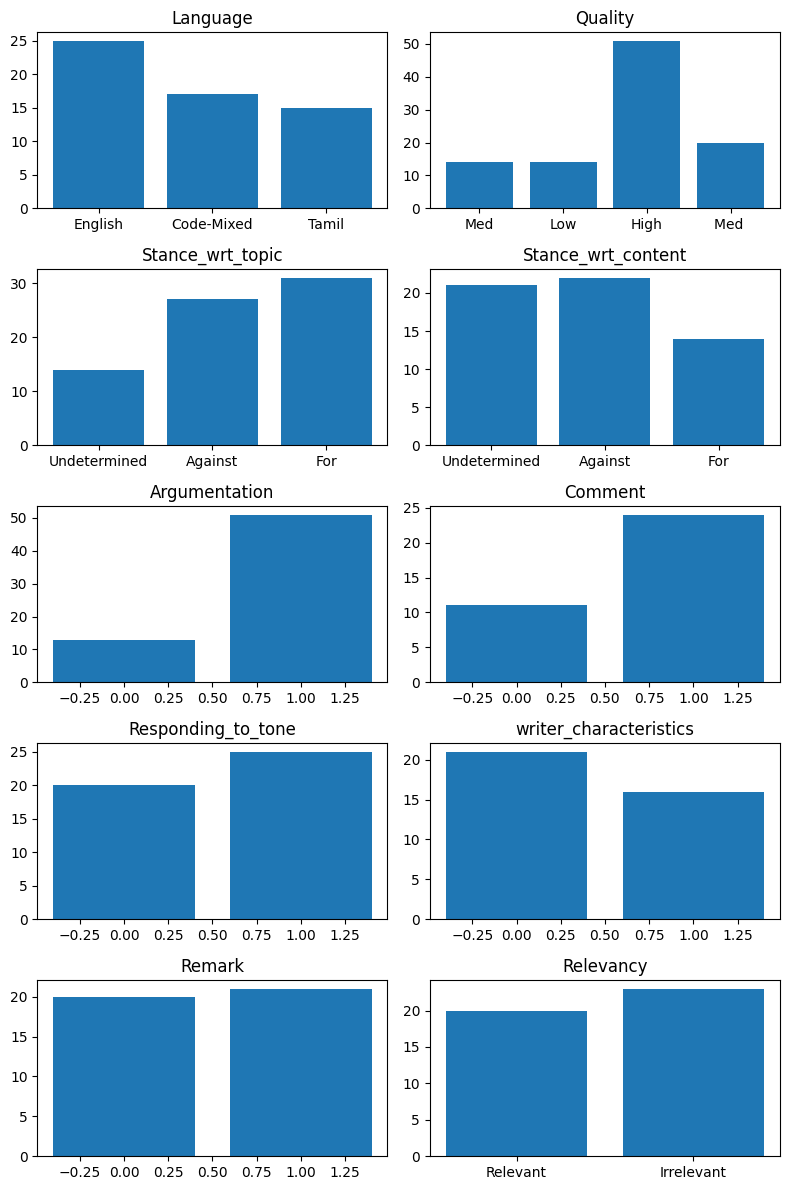

In [46]:
fig, axs = plt.subplots(5, 2, figsize=(8, 12))

axs = axs.flatten()

i=0

for y in sub_cols:
  print(y,"\n")
  values = []

  for z in yt_df[y].unique():
    sub_df = yt_df[yt_df[y]==z]

    wc=0

    for x in sub_df['Comments']:
      wc+= word_count(x)

    Average_WC = int(wc/sub_df.shape[0])
    print(z," : ",Average_WC)
    values.append(Average_WC)

  print("\n")

  axs[i].bar(yt_df[y].unique(),values)
  axs[i].set_title(y)
  i+=1

plt.tight_layout()   # Adjust the spacing between subplots

plt.show()

## Word frequencies


Calculate frequencies to determine the most common word in the corpus

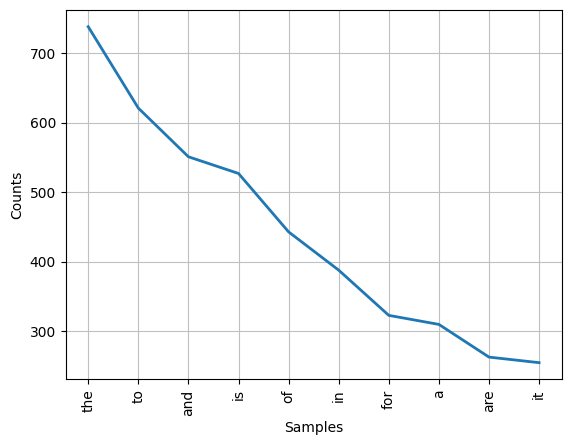

[('the', 738), ('to', 621), ('and', 551), ('is', 527), ('of', 443), ('in', 388), ('for', 323), ('a', 310), ('are', 263), ('it', 255), ('not', 254), ('we', 234), ('you', 228), ('i', 224), ('this', 214), ('that', 173), ('all', 149), ('they', 148), ('be', 142), ('as', 138)]


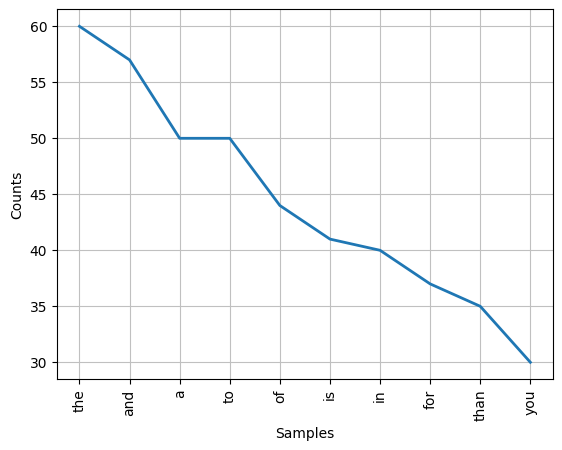

[('the', 60), ('and', 57), ('a', 50), ('to', 50), ('of', 44), ('is', 41), ('in', 40), ('for', 37), ('than', 35), ('you', 30), ('i', 20), ('all', 20), ('this', 19), ('it', 18), ('so', 17), ('or', 17), ('but', 17), ('are', 17), ('we', 16), ('not', 14)]


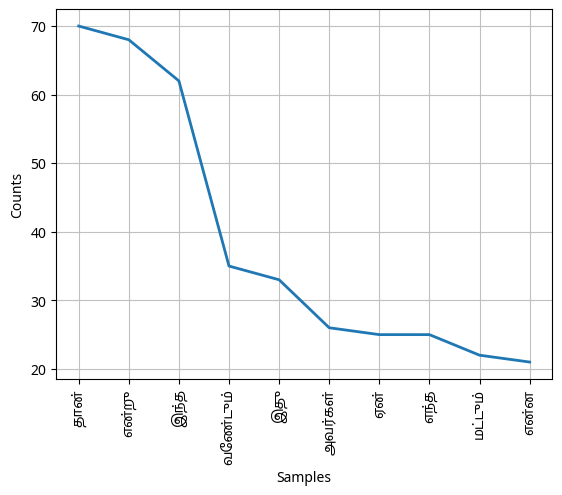

[('தான்', 70), ('என்று', 68), ('இந்த', 62), ('வேண்டும்', 35), ('இது', 33), ('அவர்கள்', 26), ('ஏன்', 25), ('எந்த', 25), ('மட்டும்', 22), ('என்ன', 21), ('கொண்டு', 21), ('அந்த', 20), ('எல்லாம்', 20), ('அது', 19), ('மற்றும்', 19), ('இருக்கும்', 18), ('உள்ளது', 15), ('விட்டு', 15), ('என்ற', 14), ('வந்து', 13)]


In [52]:
from nltk.corpus import stopwords
import re

#set stopwords
stopwords_set = stopwords.words('english')
stopwords_set.extend(["cnn", "'s", "a", "the","u","r","ur"])

#stopwords for Tamil
stopwords_tamil = pd.read_csv('./tamil_stopwords.txt')
stopwords_set_tamil = list(stopwords_tamil.iloc[:,0])

#create word tokens
tokenized_words = []
tamil_tokenized_words = []
code_mixed_tokenized_words = []

for i in range(yt_df.shape[0]):
  if yt_df['Language'][i] == "English":
    tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',yt_df['Comments'][i]))

  elif yt_df['Language'][i] == "Tamil":
    translation_table = str.maketrans("", "", string.punctuation)
    tamil_tokenized_words+=word_tokenize(yt_df['Comments'][i].translate(translation_table))

  else:
    code_mixed_tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',yt_df['Comments'][i]))

new_tokenized_words = []
new_tamil_tokenized_words = []
new_code_mixed_tokenized_words = []

for x in tokenized_words:
  if x.lower().strip() in stopwords_set:
    new_tokenized_words.append(x.lower().strip())

for x in tamil_tokenized_words:
  if x.strip() in stopwords_set_tamil:
    new_tamil_tokenized_words.append(x)

for x in code_mixed_tokenized_words:
  if x.lower().strip() in stopwords_set:
    new_code_mixed_tokenized_words.append(x.lower().strip())

tokenized_words = new_tokenized_words
tamil_tokenized_words = new_tamil_tokenized_words
code_mixed_tokenized_words = new_code_mixed_tokenized_words

all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

all_words=nltk.FreqDist(code_mixed_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

plt.rc('font', family='Noto Sans Tamil')

all_words=nltk.FreqDist(tamil_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

plt.rc('font', family='Sans Serif')

In [56]:
from nltk.corpus import stopwords
import re

#set stopwords
stopwords_set = stopwords.words('english')
stopwords_set.extend(["cnn", "'s", "a", "the","u","r","ur"])

#stopwords for Tamil
stopwords_tamil = pd.read_csv('./tamil_stopwords.txt')
stopwords_set_tamil = list(stopwords_tamil.iloc[:,0])

#create word tokens
tokenized_words = []
tamil_tokenized_words = []
code_mixed_tokenized_words = []

for i in range(yt_df.shape[0]):
  if yt_df['Language'][i] == "English":
    tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',yt_df['Comments'][i]))

  elif yt_df['Language'][i] == "Tamil":
    translation_table = str.maketrans("", "", string.punctuation)
    tamil_tokenized_words+=word_tokenize(yt_df['Comments'][i].translate(translation_table))

  else:
    code_mixed_tokenized_words+=word_tokenize(re.sub(r'[^\w\s]', '',yt_df['Comments'][i]))

new_tokenized_words = []
new_tamil_tokenized_words = []
new_code_mixed_tokenized_words = []

for x in tokenized_words:
  if x.lower().strip() not in stopwords_set:
    new_tokenized_words.append(x.lower().strip())

for x in tamil_tokenized_words:
  if x.strip() not in stopwords_set_tamil:
    new_tamil_tokenized_words.append(x)

for x in code_mixed_tokenized_words:
  if x.lower().strip() not in stopwords_set and len(x)>=4:
    new_code_mixed_tokenized_words.append(x.lower().strip())

tokenized_words = new_tokenized_words
tamil_tokenized_words = new_tamil_tokenized_words
code_mixed_tokenized_words = new_code_mixed_tokenized_words

In [54]:
print(stopwords_set_tamil)

['என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்', 'அல்லது', 'அவர்', 'நான்', 'உள்ள', 'அந்த', 'இவர்', 'என', 'முதல்', 'என்ன', 'இருந்து', 'சில', 'என்', 'போன்ற', 'வேண்டும்', 'வந்து', 'இதன்', 'அது', 'அவன்', 'தான்', 'பலரும்', 'என்னும்', 'மேலும்', 'பின்னர்', 'கொண்ட', 'இருக்கும்', 'தனது', 'உள்ளது', 'போது', 'என்றும்', 'அதன்', 'தன்', 'பிறகு', 'அவர்கள்', 'வரை', 'அவள்', 'நீ', 'ஆகிய', 'இருந்தது', 'உள்ளன', 'வந்த', 'இருந்த', 'மிகவும்', 'இங்கு', 'மீது', 'ஓர்', 'இவை', 'இந்தக்', 'பற்றி', 'வரும்', 'வேறு', 'இரு', 'இதில்', 'போல்', 'இப்போது', 'அவரது', 'மட்டும்', 'இந்தப்', 'எனும்', 'மேல்', 'பின்', 'சேர்ந்த', 'ஆகியோர்', 'எனக்கு', 'இன்னும்', 'அந்தப்', 'அன்று', 'ஒரே', 'மிக', 'அங்கு', 'பல்வேறு', 'விட்டு', 'பெரும்', 'அதை', 'பற்றிய', 'உன்', 'அதிக', 'அந்தக்', 'பேர்', 'இதனால்', 'அவை', 'அதே', 'ஏன்', 'முறை', 'யார்', 'என்பதை', 'எல்லாம்', 'மட்டுமே', 'இங்கே', 'அங்கே', 'இடம்', 'இடத்தில்', 'அதில்', 'நாம்', 'அதற்கு', 'எனவே', 'பிற', 'சிறு', 'மற்ற', 'விட', 'எந்த', 'எனவும்', 'எனப்படும்', 'எனினும்', 

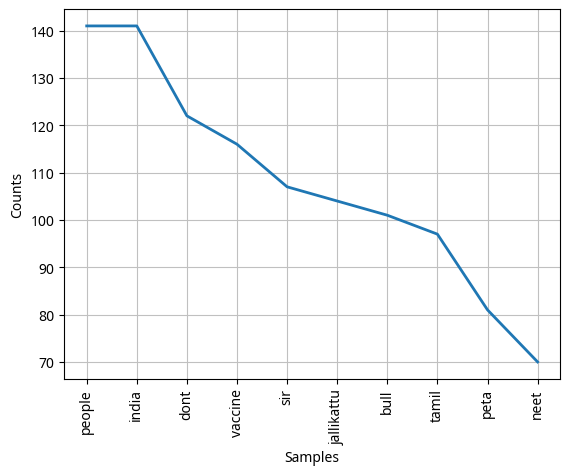

[('people', 141), ('india', 141), ('dont', 122), ('vaccine', 116), ('sir', 107), ('jallikattu', 104), ('bull', 101), ('tamil', 97), ('peta', 81), ('neet', 70), ('like', 67), ('one', 65), ('please', 65), ('good', 64), ('indian', 62), ('ban', 59), ('culture', 59), ('us', 58), ('also', 57), ('get', 57)]


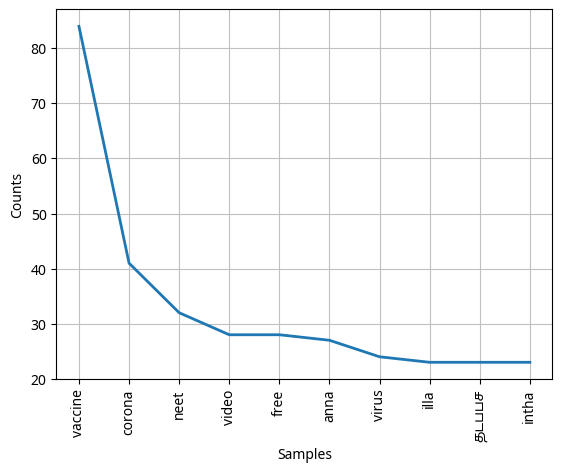

[('vaccine', 84), ('corona', 41), ('neet', 32), ('video', 28), ('free', 28), ('anna', 27), ('virus', 24), ('illa', 23), ('தடபபச', 23), ('intha', 23), ('tamil', 23), ('enna', 23), ('மககள', 22), ('poda', 21), ('neenga', 21), ('மறறம', 20), ('people', 20), ('govt', 20), ('covid', 17), ('sollunga', 17)]


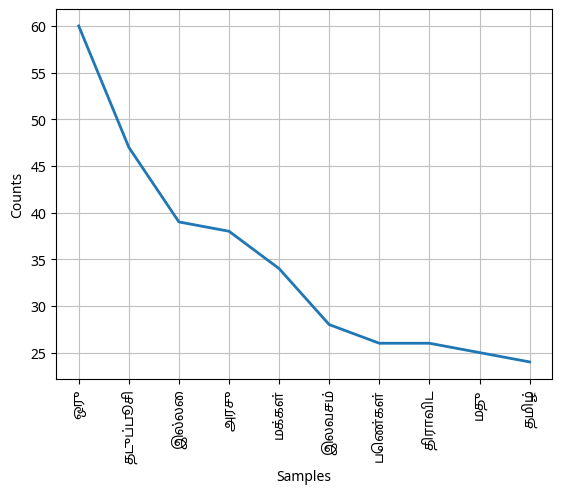

[('ஒரு', 60), ('தடுப்பூசி', 47), ('இல்லை', 39), ('அரசு', 38), ('மக்கள்', 34), ('இலவசம்', 28), ('பெண்கள்', 26), ('திராவிட', 26), ('மது', 25), ('தமிழ்', 24), ('நல்ல', 23), ('ஊசி', 22), ('திமுக', 22), ('கொரோனா', 21), ('பயணம்', 21), ('இலவச', 21), ('நீங்கள்', 19), ('10', 19), ('மாடல்', 19), ('பஸ்', 19)]


In [57]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

all_words=nltk.FreqDist(code_mixed_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

plt.rc('font', family='Noto Sans Tamil')

all_words=nltk.FreqDist(tamil_tokenized_words)
all_words.plot(10)
print(all_words.most_common(20))

**word CLoud**

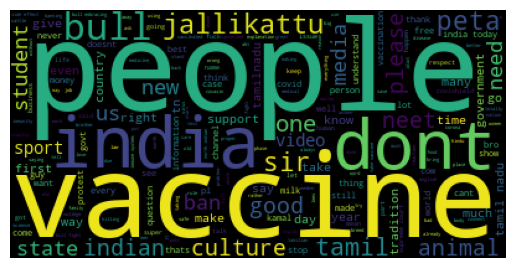

In [61]:
from wordcloud import WordCloud

comments_text = ' '.join(tokenized_words)

english_wordcloud = WordCloud().generate(comments_text)

plt.rc('font', family='Sans Serif')
plt.imshow(english_wordcloud)
plt.axis("off")
plt.show()

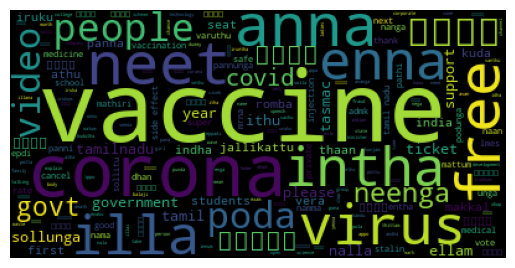

In [62]:
from wordcloud import WordCloud

comments_text = ' '.join(code_mixed_tokenized_words)

code_mixed_wordcloud = WordCloud().generate(comments_text)

plt.imshow(code_mixed_wordcloud)
plt.axis("off")
plt.show()

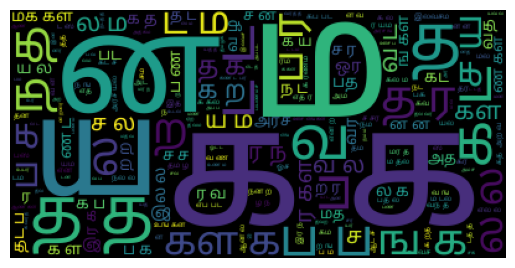

In [63]:
from wordcloud import WordCloud

font_paths = './tamil_font/NotoSansTamil-VariableFont_wdth,wght.ttf'

comments_text = ' '.join(tamil_tokenized_words)

tamil_wordcloud = WordCloud(font_path=font_paths).generate(comments_text)

plt.rc('font', family='Noto Sans Tamil')
plt.imshow(tamil_wordcloud)
plt.axis("off")
plt.show()

## Collocations


In [64]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

tokenized_words = [string for string in tokenized_words if not (string.isdigit() or any(char.isdigit() for char in string))]
tamil_tokenized_words = [string for string in tamil_tokenized_words if not (string.isdigit() or any(char.isdigit() for char in string))]
code_mixed_tokenized_words = [string for string in code_mixed_tokenized_words if not (string.isdigit() or any(char.isdigit() for char in string))]

english_finder = BigramCollocationFinder.from_words(tokenized_words)
tamil_finder = BigramCollocationFinder.from_words(tamil_tokenized_words)
code_mixed_finder = BigramCollocationFinder.from_words(code_mixed_tokenized_words)

tri_english_finder = TrigramCollocationFinder.from_words(tokenized_words)
tri_tamil_finder = TrigramCollocationFinder.from_words(tamil_tokenized_words)
tri_code_mixed_finder = TrigramCollocationFinder.from_words(code_mixed_tokenized_words)

#Using PMI scores to quantify and rank the BiGrams
print(english_finder.nbest(bigram_measures.pmi, 50))
print(tamil_finder.nbest(bigram_measures.pmi, 50))
print(code_mixed_finder.nbest(bigram_measures.pmi, 50))

print("\n\n")

#Using PMI scores to quantify and rank the TriGrams
print(tri_english_finder.nbest(trigram_measures.pmi, 50))
print(tri_tamil_finder.nbest(trigram_measures.pmi, 50))
print(tri_code_mixed_finder.nbest(trigram_measures.pmi, 50))

[('aadu', 'yapadi'), ('aaga', 'mudiyathu'), ('abolished', 'concession'), ('about_jalikattu', 'trackers'), ('accidents', 'thrown'), ('activists', 'upset'), ('adoped', 'valuesthis'), ('adrenaline', 'rush'), ('advance', 'expressing'), ('ahout', 'uproar'), ('alavu', 'mask'), ('alilments', 'calcium'), ('allergy', 'ciprofloxacin'), ('alphamale', 'winner'), ('als', 'complot'), ('ambassador', 'iranian'), ('analyse', 'policy'), ('anchornot', 'interviewasl'), ('anne', 'sivam'), ('anybodybillionaire', 'celebrity'), ('ap', 'telangana'), ('apdina', 'yenanu'), ('apkd', 'kidney'), ('appeasement', 'selective'), ('application', 'registration'), ('appointing', 'lawyers'), ('apuduthan', 'natuvelangam'), ('araasangathin', 'meethu'), ('arguing', 'easier'), ('arrest', 'violators'), ('arrive', 'page'), ('arts', 'contests'), ('arun', 'military'), ('ashwins', 'tweet'), ('assets', 'rs'), ('associated', 'probability'), ('astra', 'zeneca'), ('athletic', 'slim'), ('attributing', 'motives'), ('audiencereaders', 'su

## Word associations

In [65]:
from nltk import BigramAssocMeasures
bigram_measures = BigramAssocMeasures()

print(english_finder.nbest(bigram_measures.likelihood_ratio, 20))
print(tamil_finder.nbest(bigram_measures.likelihood_ratio, 20))
print(code_mixed_finder.nbest(bigram_measures.likelihood_ratio, 20))

print("\n\n")

print(tri_english_finder.nbest(trigram_measures.likelihood_ratio, 20))
print(tri_tamil_finder.nbest(trigram_measures.likelihood_ratio, 20))
print(tri_code_mixed_finder.nbest(trigram_measures.likelihood_ratio, 20))

[('tamil', 'nadu'), ('supreme', 'court'), ('india', 'today'), ('bull', 'embracing'), ('immune', 'system'), ('side', 'effects'), ('bull', 'taming'), ('bull', 'fight'), ('stray', 'dogs'), ('well', 'said'), ('kamal', 'hassan'), ('board', 'exams'), ('neet', 'exam'), ('thank', 'much'), ('double', 'standard'), ('jai', 'hind'), ('shut', 'mouth'), ('actor', 'vivek'), ('national', 'media'), ('animal', 'welfare')]
[('திராவிட', 'மாடல்'), ('எம்', 'ஜி'), ('ஜி', 'ஆர்'), ('விமான', 'நிலையங்கள்'), ('தமிழ்', 'நாட்டில்'), ('மது', 'விலக்கு'), ('செந்தில்', 'பாலாஜி'), ('திமுக', 'ஆட்சியில்'), ('மாடல்', 'ஆட்சி'), ('இட', 'ஒதுக்கீடு'), ('இலவச', 'பேருந்து'), ('நோய்', 'எதிர்ப்புச்'), ('நோய்', 'எதிர்ப்பு'), ('எதிர்ப்புச்', 'சக்தியை'), ('போக்குவரத்து', 'துறை'), ('புதிய', 'தலைமுறை'), ('தமிழ்', 'நாடு'), ('விலை', 'வாசி'), ('எதிர்ப்பு', 'சக்தி'), ('தேவை', 'இல்லாத')]
[('tamil', 'nadu'), ('மலலயனல', 'இரதத'), ('side', 'effects'), ('clot', 'million'), ('middle', 'class'), ('blood', 'clot'), ('umar', 'farook'), ('healer', 'u

**Associations with specific words of interest**

In [66]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

topic_filter1 = lambda *w: 'jallikattu' not in w
topic_filter2 = lambda *w: 'alcohol' not in w
topic_filter3 = lambda *w: 'neet' not in w
topic_filter4 = lambda *w: 'covid' not in w
topic_filter5 = lambda *w: 'bus' not in w

#ENGLISH
finder1 = BigramCollocationFinder.from_words(tokenized_words)
finder2 = BigramCollocationFinder.from_words(tokenized_words)
finder3 = BigramCollocationFinder.from_words(tokenized_words)
finder4 = BigramCollocationFinder.from_words(tokenized_words)
finder5 = BigramCollocationFinder.from_words(tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

#CODE_MIXED
print("\n\n")
finder1 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder2 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder3 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder4 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)
finder5 = BigramCollocationFinder.from_words(code_mixed_tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

topic_filter1 = lambda *w: 'ஜல்லிக்கட்டு' not in w
topic_filter2 = lambda *w: 'மது' not in w
topic_filter3 = lambda *w: 'நீட்' not in w
topic_filter4 = lambda *w: 'கொரோனா' not in w
topic_filter5 = lambda *w: 'பஸ்' not in w

#TAMIL
print("\n\n")
finder1 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder2 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder3 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder4 = BigramCollocationFinder.from_words(tamil_tokenized_words)
finder5 = BigramCollocationFinder.from_words(tamil_tokenized_words)

finder1.apply_ngram_filter(topic_filter1)
print(finder1.nbest(bigram_measures.likelihood_ratio, 10))

finder2.apply_ngram_filter(topic_filter2)
print(finder2.nbest(bigram_measures.likelihood_ratio, 10))

finder3.apply_ngram_filter(topic_filter3)
print(finder3.nbest(bigram_measures.likelihood_ratio, 10))

finder4.apply_ngram_filter(topic_filter4)
print(finder4.nbest(bigram_measures.likelihood_ratio, 10))

finder5.apply_ngram_filter(topic_filter5)
print(finder5.nbest(bigram_measures.likelihood_ratio, 10))

[('support', 'jallikattu'), ('need', 'jallikattu'), ('jallikattu', 'chinmayi'), ('wedojallikattu', 'jallikattu'), ('jallikattu', 'dangerous'), ('jallikattu', 'movement'), ('certainly', 'jallikattu'), ('discussion', 'jallikattu'), ('donewe', 'jallikattu'), ('grand', 'jallikattu')]
[('alcohol', 'addicts'), ('alcohol', 'factories'), ('runs', 'alcohol'), ('alcohol', 'stadium'), ('sell', 'alcohol'), ('alcohol', 'everywhere'), ('humans', 'alcohol'), ('countries', 'alcohol'), ('selling', 'alcohol'), ('alcohol', 'women')]
[('neet', 'exam'), ('cancel', 'neet'), ('marks', 'neet'), ('neet', 'cancelled'), ('neet', 'coaching'), ('cancellation', 'neet'), ('neet', 'totally'), ('neet', 'important'), ('write', 'neet'), ('abolition', 'neet')]
[('covid', 'cases'), ('covid', 'vaccine'), ('covid', 'patients'), ('covid', 'shild'), ('covid', 'symptom'), ('covid', 'variants'), ('fall', 'covid'), ('infected', 'covid'), ('tk', 'covid'), ('covid', 'vaccination')]
[('free', 'bus'), ('bus', 'fare'), ('bus', 'charg

## Regex

In [68]:
match_1 = 0
match_2 = 0
match_3 = 0
match_4 = 0
match_5 = 0

for x in yt_df["Comments"]:
  match_1 += len(re.findall("jallikattu",x,flags=re.IGNORECASE))
  match_1 += len(re.findall("jalikattu",x,flags=re.IGNORECASE))
  match_1 += len(re.findall("ஜல்லிக்கட்டு",x,flags=re.IGNORECASE))

  match_2 += len(re.findall("நீட்",x,flags=re.IGNORECASE))
  match_2 += len(re.findall("NEET",x,flags=re.IGNORECASE))

  match_3 += len(re.findall("Covid",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("vaccine",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("கொரோனா",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("டோஸ்",x,flags=re.IGNORECASE))
  match_3 += len(re.findall("தடுப்பூசி",x,flags=re.IGNORECASE))

  match_4 += len(re.findall("bus",x,flags=re.IGNORECASE))
  match_4 += len(re.findall("pass",x,flags=re.IGNORECASE))
  match_4 += len(re.findall("பஸ்",x,flags=re.IGNORECASE))

  match_5 += len(re.findall("alcohol",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("tasmac",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("liquor",x,flags=re.IGNORECASE))
  match_5 += len(re.findall("மது",x,flags=re.IGNORECASE))

print("Jallikattu : ",match_1)
print("NEET : ",match_2)
print("Covid or Vaccine: ",match_3)
print("Bus or Pass : ",match_4)
print("Alcohol or Tasmac or Liquor : ",match_5)

Jallikattu :  159
NEET :  116
Covid or Vaccine:  433
Bus or Pass :  164
Alcohol or Tasmac or Liquor :  116


In [70]:
matches = 0

for x in yt_df["Comments"]:
  matches += len(re.findall("http",x))

print("Number of times a URL is provided as an evidence/ support : ",matches)

Number of times a URL is provided as an evidence/ support :  6


In [71]:
matches = 0

for x in yt_df["Comments"]:
  matches += len(re.findall("#",x))

print("Number of times an hastag is used : ",matches)

Number of times an hastag is used :  70


## Character Level Counts

<Axes: >

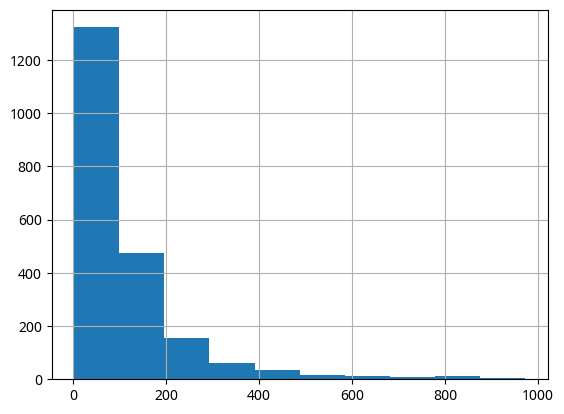

In [99]:
char_counts = yt_df["Comments"].str.len()
char_counts[char_counts<=1000].hist()

## Time Line of videos (column not present in our dataset)

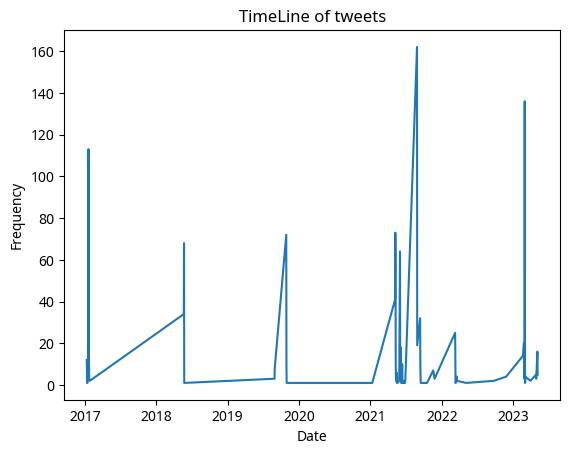

In [54]:
vc = yt_df['Date'].value_counts()

dates = []

for x,y in zip(vc.index,vc.values):
    z = []
    z.append(x)
    z.append(y)
    dates.append(tuple(z))

dates = sorted(dates)

x_values = [t[0] for t in dates]
y_values = [t[1] for t in dates]

plt.plot(x_values,y_values)

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('TimeLine of tweets')
plt.show()